In [1]:
import pandas as pd
import numpy as np
maxlen = 6
#dataframe2 = pd.DataFrame(np.full((maxlen, 7),np.nan))
team=['IMMOBILE', 'DZEKO', 'LOZANO', 'MURIEL', 'JOAO PEDRO', 'MESSIAS']
#dataframe2 = pd.DataFrame(columns=['Nome','Voto','Gf','Rf','Ass','Gdv','Gdp'])
df=[]
#voti=[]

dataframe=[]

In [2]:
voti=pd.DataFrame()
for i in range(1,39):
    print(i)
    vote= pd.read_excel('2019-20_'+str(i)+'.xlsx', sheet_name='Statistico')  
    df=vote.iloc[4:]
    df.columns = df.iloc[0]
    dataframe2 = pd.DataFrame(columns=['Nome','Voto','Gf','Rf','Rs','Amm','Ass','Esp','Gdv','Gdp'])
    for a in team:
        for index, row in df.iterrows():
            if row['Nome'] == a:
                dataframe2.loc[index] =  row
    dataframe2.to_csv('voti.csv',index=False, header=True)
    data=pd.read_csv('voti.csv')
    data['Voto'] = data['Voto'].astype(str)
    data['Voto'] = data['Voto'].map(lambda x: x.rstrip('*'))
    data["Voto"] = pd.to_numeric(data["Voto"])
    data['FV'+str(i)] = data.eval('(Gf*3)+(Rf*3)-(Rs*3)-(Amm*1)+(Ass*1)-(Esp*2)+(Gdv*2)+Voto')
    data.set_index('Nome', drop=True, inplace=True)
    voti = pd.concat([voti,data['FV'+str(i)]], axis = 1)
   
  

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38


In [3]:
pd.options.display.max_columns = None

In [4]:
voti

,FV1,FV2,FV3,FV4,FV5,FV6,FV7,FV8,FV9,FV10,FV11,FV12,FV13,FV14,FV15,FV16,FV17,FV18,FV19,FV20,FV21,FV22,FV23,FV24,FV25,FV26,FV27,FV28,FV29,FV30,FV31,FV32,FV33,FV34,FV35,FV36,FV37,FV38
IMMOBILE,15.5,6.5,9.0,12.0,5.5,11.5,13.5,13.5,13.5,13.5,10.0,12.0,9.5,15.5,2.5,5.5,5.5,15.5,12.5,19.0,4.0,15.0,5.5,10.0,9.5,7.5,5.0,9.0,8.5,NaN,4.0,4.0,5.0,10.0,12.0,17.0,10.0,9.0
DZEKO,10.5,6.5,10.0,11.0,5.5,12.0,5.5,6.5,10.0,5.5,6.5,5.0,9.5,6.5,6.0,6.5,13.0,5.5,6.0,9.0,9.0,9.5,5.0,9.5,11.5,NaN,16.0,5.0,6.0,6.5,6.0,6.5,11.5,8.0,NaN,7.0,10.5,NaN
MURIEL,16.0,5.5,10.0,5.5,NaN,NaN,5.5,13.5,19.5,6.0,5.0,5.5,5.5,5.5,9.0,5.0,10.0,6.0,2.0,5.5,13.5,5.5,NaN,6.0,5.0,10.0,5.5,15.5,6.0,12.0,10.0,7.0,NaN,6.0,12.0,6.0,6.5,6.5
JOAO PEDRO,5.0,10.0,4.5,9.0,6.5,6.0,9.5,6.0,5.5,15.0,6.0,10.0,9.5,13.5,9.5,7.5,9.5,4.5,5.0,13.5,7.5,6.0,5.0,4.5,NaN,9.0,7.5,11.0,5.5,5.0,5.5,5.5,6.0,10.0,5.5,5.5,5.5,NaN
LOZANO,NaN,10.0,5.5,6.0,5.0,NaN,4.0,NaN,NaN,5.5,7.5,5.5,9.5,5.5,5.0,6.0,NaN,6.0,6.0,6.0,NaN,NaN,6.0,NaN,NaN,NaN,9.5,6.5,6.5,6.0,12.0,6.0,5.5,NaN,4.5,NaN,5.0,6.0


In [27]:
calc=voti
calc.fillna(6, inplace=True)


In [28]:
calc

,FV1,FV2,FV3,FV4,FV5,FV6,FV7,FV8,FV9,FV10,FV11,FV12,FV13,FV14,FV15,FV16,FV17,FV18,FV19,FV20,FV21,FV22,FV23,FV24,FV25,FV26,FV27,FV28,FV29,FV30,FV31,FV32,FV33,FV34,FV35,FV36,FV37,FV38
IMMOBILE,15.5,6.5,9.0,12.0,5.5,11.5,13.5,13.5,13.5,13.5,10.0,12.0,9.5,15.5,2.5,5.5,5.5,15.5,12.5,19.0,4.0,15.0,5.5,10.0,9.5,7.5,5.0,9.0,8.5,6.0,4.0,4.0,5.0,10.0,12.0,17.0,10.0,9.0
DZEKO,10.5,6.5,10.0,11.0,5.5,12.0,5.5,6.5,10.0,5.5,6.5,5.0,9.5,6.5,6.0,6.5,13.0,5.5,6.0,9.0,9.0,9.5,5.0,9.5,11.5,6.0,16.0,5.0,6.0,6.5,6.0,6.5,11.5,8.0,6.0,7.0,10.5,6.0
MURIEL,16.0,5.5,10.0,5.5,6.0,6.0,5.5,13.5,19.5,6.0,5.0,5.5,5.5,5.5,9.0,5.0,10.0,6.0,2.0,5.5,13.5,5.5,6.0,6.0,5.0,10.0,5.5,15.5,6.0,12.0,10.0,7.0,6.0,6.0,12.0,6.0,6.5,6.5
JOAO PEDRO,5.0,10.0,4.5,9.0,6.5,6.0,9.5,6.0,5.5,15.0,6.0,10.0,9.5,13.5,9.5,7.5,9.5,4.5,5.0,13.5,7.5,6.0,5.0,4.5,6.0,9.0,7.5,11.0,5.5,5.0,5.5,5.5,6.0,10.0,5.5,5.5,5.5,6.0
LOZANO,6.0,10.0,5.5,6.0,5.0,6.0,4.0,6.0,6.0,5.5,7.5,5.5,9.5,5.5,5.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,9.5,6.5,6.5,6.0,12.0,6.0,5.5,6.0,4.5,6.0,5.0,6.0


### media mobile attenzione FV5 comprende la giornata 5-> shiftare

In [29]:
calc=calc.T

In [44]:
calc

,IMMOBILE,DZEKO,MURIEL,JOAO PEDRO,LOZANO
FV1,15.5,10.5,16.0,5.0,6.0
FV2,6.5,6.5,5.5,10.0,10.0
FV3,9.0,10.0,10.0,4.5,5.5
FV4,12.0,11.0,5.5,9.0,6.0
FV5,5.5,5.5,6.0,6.5,5.0
FV6,11.5,12.0,6.0,6.0,6.0
FV7,13.5,5.5,5.5,9.5,4.0
FV8,13.5,6.5,13.5,6.0,6.0
FV9,13.5,10.0,19.5,5.5,6.0
FV10,13.5,5.5,6.0,15.0,5.5


In [45]:
immobile = calc.filter(['IMMOBILE'], axis=1)

In [46]:
immobile

,IMMOBILE
FV1,15.5
FV2,6.5
FV3,9.0
FV4,12.0
FV5,5.5
FV6,11.5
FV7,13.5
FV8,13.5
FV9,13.5
FV10,13.5


In [47]:
immobile['MA_3'] = immobile.IMMOBILE.rolling(3).mean()

In [48]:
immobile['MA_5'] = immobile.IMMOBILE.rolling(5).mean()

In [49]:
immobile

,IMMOBILE,MA_3,MA_5
FV1,15.5,NaN,NaN
FV2,6.5,NaN,NaN
FV3,9.0,10.333333,NaN
FV4,12.0,9.166667,NaN
FV5,5.5,8.833333,9.7
FV6,11.5,9.666667,8.9
FV7,13.5,10.166667,10.3
FV8,13.5,12.833333,11.2
FV9,13.5,13.500000,11.5
FV10,13.5,13.500000,13.1


In [52]:
import matplotlib.pyplot as plt

In [53]:
plt.style.use('fivethirtyeight')

In [60]:
close = immobile['IMMOBILE']
sma30 = immobile['MA_3']
sma50 =immobile['MA_5']

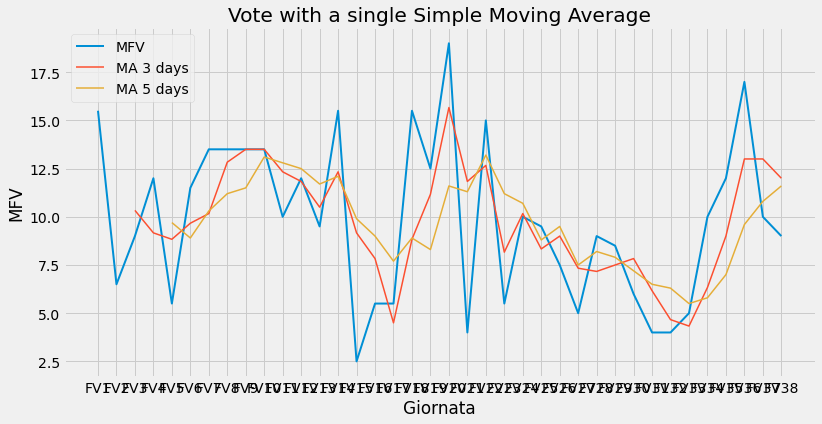

In [62]:
#The size for our chart:   
plt.figure(figsize = (12,6))#Plotting price and SMA lines:   
plt.plot(close, label='MFV', linewidth = 2)   
plt.plot(sma30, label='MA 3 days', linewidth = 1.5)
plt.plot(sma50, label='MA 5 days', linewidth = 1.5)#Adding title and labeles on the axes, making legend visible:   
plt.xlabel('Giornata')   
plt.ylabel('MFV')   
plt.title('Vote with a single Simple Moving Average')   
plt.legend()
plt.show()

In [42]:
immobile("IMMOBILE").shift(1)

TypeError: 'Series' object is not callable

In [39]:
immobile

FV1      NaN
FV2     15.5
FV3      6.5
FV4      9.0
FV5     12.0
FV6      5.5
FV7     11.5
FV8     13.5
FV9     13.5
FV10    13.5
FV11    13.5
FV12    10.0
FV13    12.0
FV14     9.5
FV15    15.5
FV16     2.5
FV17     5.5
FV18     5.5
FV19    15.5
FV20    12.5
FV21    19.0
FV22     4.0
FV23    15.0
FV24     5.5
FV25    10.0
FV26     9.5
FV27     7.5
FV28     5.0
FV29     9.0
FV30     8.5
FV31     6.0
FV32     4.0
FV33     4.0
FV34     5.0
FV35    10.0
FV36    12.0
FV37    17.0
FV38    10.0
Name: IMMOBILE, dtype: float64

In [65]:
immobile.dropna(inplace=True)
immobile.round(1)

,IMMOBILE,MA_3,MA_5
FV5,5.5,8.8,9.7
FV6,11.5,9.7,8.9
FV7,13.5,10.2,10.3
FV8,13.5,12.8,11.2
FV9,13.5,13.5,11.5
FV10,13.5,13.5,13.1
FV11,10.0,12.3,12.8
FV12,12.0,11.8,12.5
FV13,9.5,10.5,11.7
FV14,15.5,12.3,12.1


In [70]:
# Our trading condition:  
long_positions = np.where(immobile['MA_3'] > immobile['MA_5'], 1, 0)  


In [72]:
immobile['Position'] = long_positions


In [74]:
immobile.round(3)

,IMMOBILE,MA_3,MA_5,Position
FV5,5.5,8.833,9.7,0
FV6,11.5,9.667,8.9,1
FV7,13.5,10.167,10.3,0
FV8,13.5,12.833,11.2,1
FV9,13.5,13.500,11.5,1
FV10,13.5,13.500,13.1,1
FV11,10.0,12.333,12.8,0
FV12,12.0,11.833,12.5,0
FV13,9.5,10.500,11.7,0
FV14,15.5,12.333,12.1,1


In [76]:
buy_signals = (immobile['Position'] == 1) & (immobile['Position'].shift(1) == 0)
immobile.loc[buy_signals].round(3)

,IMMOBILE,MA_3,MA_5,Position
FV6,11.5,9.667,8.9,1
FV8,13.5,12.833,11.2,1
FV14,15.5,12.333,12.1,1
FV19,12.5,11.167,8.3,1
FV30,6.0,7.833,7.2,1
FV34,10.0,6.333,5.8,1


In [77]:
buy_signals_prev = (immobile['Position'].shift(-1) == 1) & (immobile['Position'] == 0)
immobile.loc[buy_signals | buy_signals_prev].round(3)

,IMMOBILE,MA_3,MA_5,Position
FV5,5.5,8.833,9.7,0
FV6,11.5,9.667,8.9,1
FV7,13.5,10.167,10.3,0
FV8,13.5,12.833,11.2,1
FV13,9.5,10.500,11.7,0
FV14,15.5,12.333,12.1,1
FV18,15.5,8.833,8.9,0
FV19,12.5,11.167,8.3,1
FV29,8.5,7.500,7.9,0
FV30,6.0,7.833,7.2,1


In [87]:
def plot_system1_sig(data):
    df = immobile.copy()
    dates = df.index
    price = df['IMMOBILE']
    sma200 = df['MA_5']
    ema20 = df['MA_3']
    
    buy_signals = (df['Position'] == 1) & (df['Position'].shift(1) == 0)
    buy_marker = sma200 * buy_signals - (sma200.max()*.05)
    buy_marker = buy_marker[buy_signals]
    buy_dates = df.index[buy_signals]
    sell_signals = (df['Position'] == 0) & (df['Position'].shift(1) == 1)
    sell_marker = sma200 * sell_signals + (sma200.max()*.05)
    sell_marker = sell_marker[sell_signals]
    sell_dates = df.index[sell_signals]
    
    with plt.style.context('fivethirtyeight'):
        fig = plt.figure(figsize=(14,7))
        plt.plot(dates, price, linewidth=1.5, label='MFV')
        plt.plot(dates, sma200, linewidth=2, label='MA 5 DAYS')
        plt.plot(dates, ema20, linewidth=2, label='MA 3 DAYS')
        plt.scatter(buy_dates, buy_marker, marker='^', color='green', s=160, label='Buy')
        plt.scatter(sell_dates, sell_marker, marker='v', color='red', s=160, label='Sell')
        plt.title("A Simple Crossover System with Signals")
        plt.ylabel('VOTI')
        plt.legend()

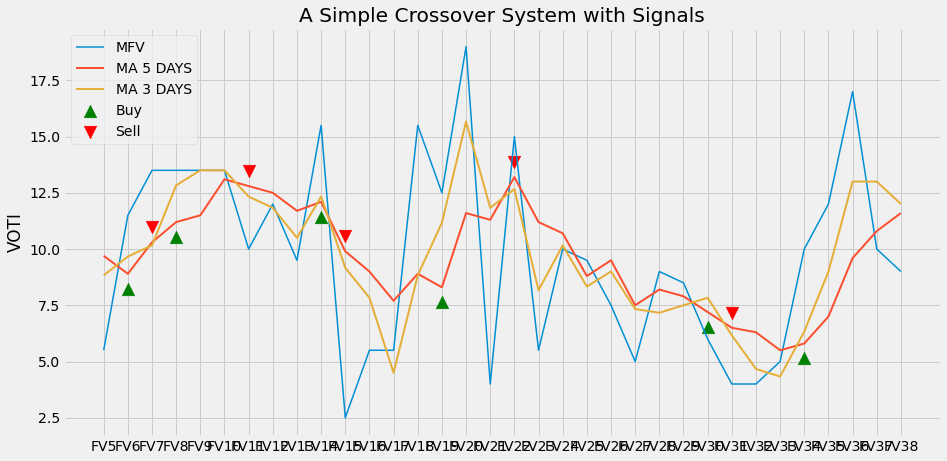

In [88]:
plot_system1_sig(immobile)

In [66]:
trades=immobile.MA_3>immobile.MA_5

In [67]:
trades

FV5     False
FV6      True
FV7     False
FV8      True
FV9      True
FV10     True
FV11    False
FV12    False
FV13    False
FV14     True
FV15    False
FV16    False
FV17    False
FV18    False
FV19     True
FV20     True
FV21     True
FV22    False
FV23    False
FV24    False
FV25    False
FV26    False
FV27    False
FV28    False
FV29    False
FV30     True
FV31    False
FV32    False
FV33    False
FV34     True
FV35     True
FV36     True
FV37     True
FV38     True
dtype: bool